This is a Markdown cell. Change the word "Example" in the title to your name or alias. Customize your work and develop your own professional communication 'branding' for your projects. 

# Example California Housing Price Prediction
**Author:** Blessing Aganaga  
**Date:** 10, 23, 2025  
**Objective:** Predict the median house price in California using available housing features.


This is a Markdown cell.

## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

This is a Markdown cell.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [17]:
# === Imports ===
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


This is a Markdown cell

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the California housing dataset directly from `scikit-learn`.
- The `fetch_california_housing` function returns a dictionary-like object with the data.
- Convert it into a pandas DataFrame.
- Display just the first 10 rows using `head()`.

Example code:

data = fetch_california_housing(as_frame=True)
data_frame = data.frame

data_frame.head(10)

In [18]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1.3 Visualize the Data


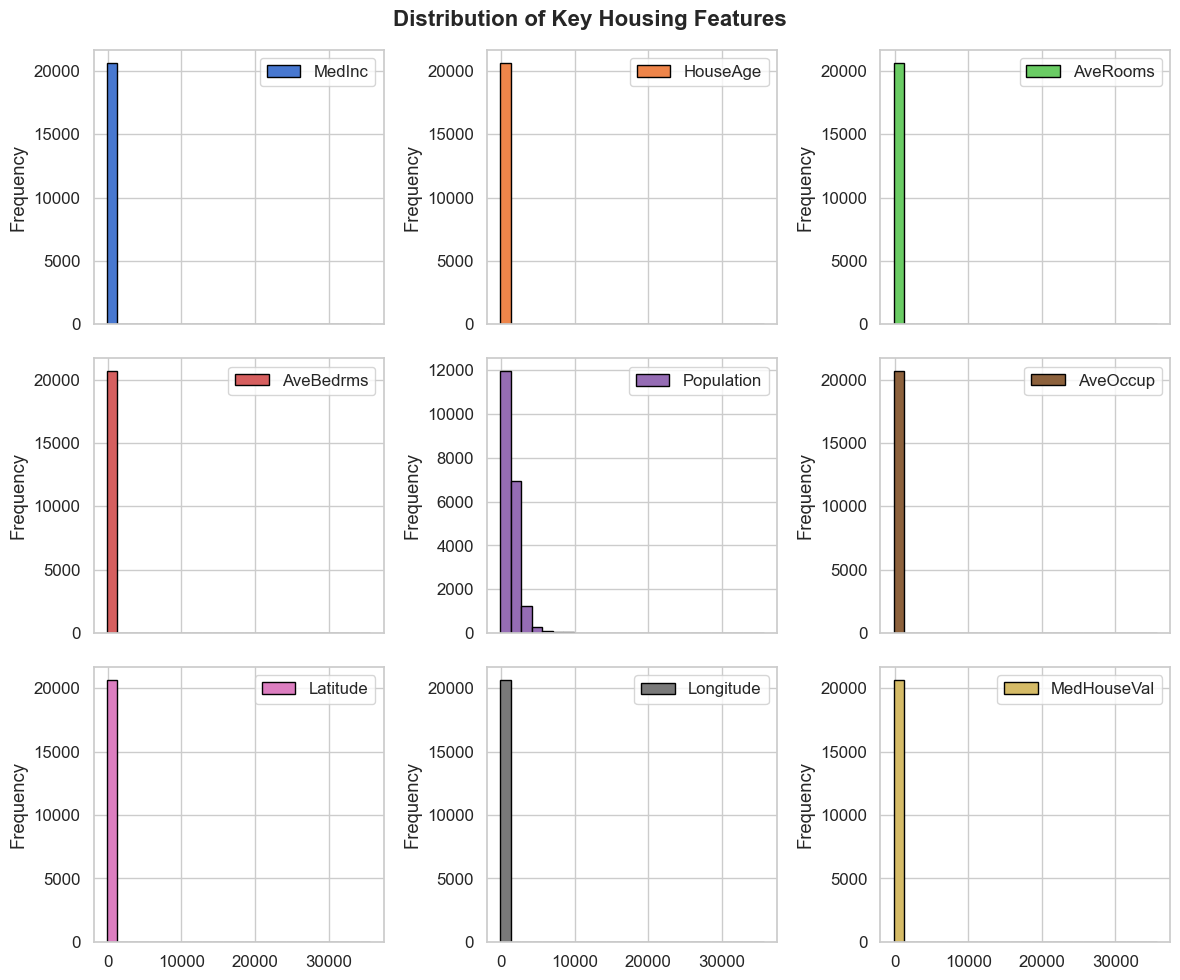

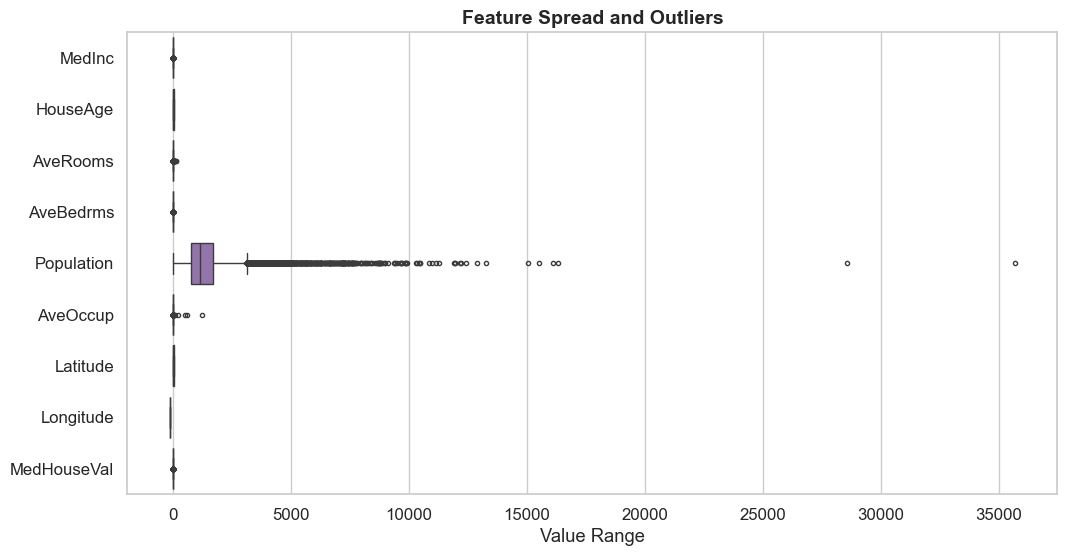

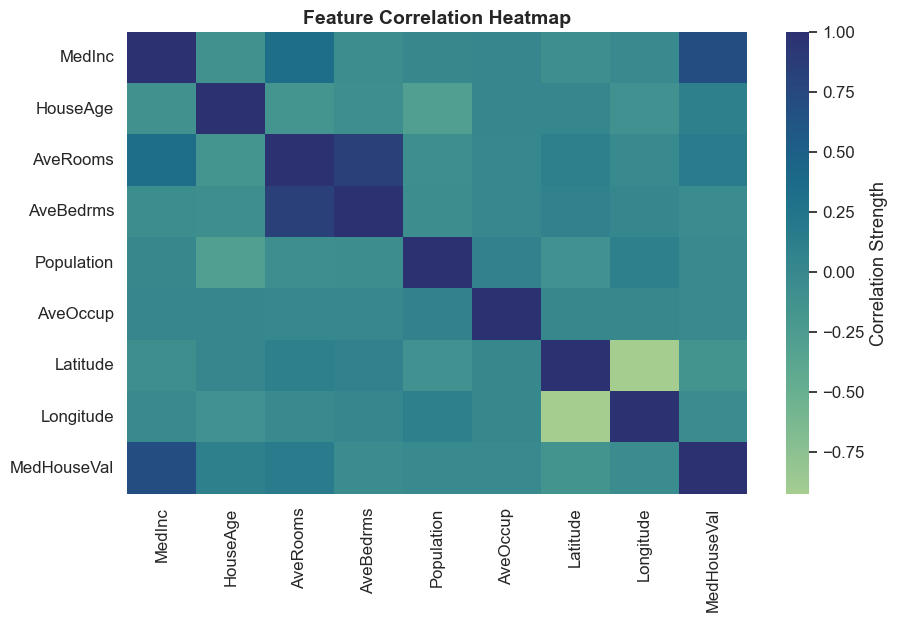

In [19]:
# Visualization section
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1️⃣ Histograms for all numeric features
df.plot(kind="hist", subplots=True, layout=(3, 3), figsize=(12, 10), bins=25, edgecolor='black')
plt.suptitle("Distribution of Key Housing Features", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

# 2️⃣ Horizontal boxplots for spread and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", fliersize=3, linewidth=1)
plt.title("Feature Spread and Outliers", fontsize=14, weight='bold')
plt.xlabel("Value Range")
plt.show()

# 3️⃣ Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="crest", cbar_kws={'label': 'Correlation Strength'})
plt.title("Feature Correlation Heatmap", fontsize=14, weight='bold')
plt.show()


In [32]:
# This is a Python cell.
# Put your comments and code here.
# Read the Markdown cell above for information and example code.
#
# For example:

# Load the data
data = fetch_california_housing(as_frame=True)
data_frame = data.frame  # type: ignore

# Might be large. Display just the first 10 rows (you can change this number)
df.head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


This is a Markdown cell.

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

Example code:

data_frame.info()

data_frame.describe()

data_frame.isnull().sum()

In [21]:
# This is a Python cell.
# Put your comments and code here.
# Read the Markdown cell above for information and example code.



This is a Markdown cell


Analysis: 

1) How many data instances (also called data records or data rows) are there?

2) How many features (also columns or attributes) are there?

3) What are the names of the features? ("Feature" is used most often in ML projects.)

4) Which features are numeric?

5) Which features are categorical (non-numeric)?

6) Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value?

7) What else do you notice about the dataset? Are there any data issues?

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

Example code:

data_frame.hist(bins=30, figsize=(12, 8))

plt.show()

In [22]:
# This is a Python cell.
# Put your comments and code here.



Generate one Boxenplot for each column (good for large datasets)

Example code:

for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

In [23]:
# This is a Python cell.
# Put your comments and code here.


Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

Example code:

sns.pairplot(data_frame)

plt.show()

In [24]:
# This is a Python cell.
# Put your comments and code here.



This is a Markdown Cell.

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_X = data_frame[features]

df_y = data_frame[target]


In [25]:
# This is a Python cell.
# Put your comments and code here.



This is a Markdown Cell.


## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


Example code:

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)


In [26]:
# This is a Python cell.
# Put your comments and code here.
#



This is a Markdown Cell.

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


Example code:


model = LinearRegression()

model.fit(X_train, y_train)


In [27]:
# This is a Python cell.
# Put your comments and code here.
#


This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.


Example code:

y_pred = model.predict(X_test)


In [28]:

# This is a Python cell. 
# Put your comments and code here.
# 

This is a Markdown Cell. 

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.


Example code:
  
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')



In [29]:
# This is a Python cell.
# Put your comments and code here.
#


This is a Markdown Cell

Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.


Example code:

mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')




In [30]:
# This is a Python cell.
# Put your comments and code here.
#



This is a Markdown Cell

Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

Example code:

rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


In [31]:
# This is a Python cell.
# Put your comments and code here.
#
